# Практика

## Определение вероятности. События

Требуется сгенерировать необходимые выборки и произвести по ним расчеты

### Задача 1
Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

In [1]:
from itertools import product
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [167]:
from itertools import combinations

In [135]:
n = 100000
outcomes1 = np.random.randint(0, 2, size=n)
outcomes2 = np.random.randint(0, 2, size=n)
result = (outcomes1 != outcomes2).sum() / n
print(f'Вероятность того, что монеты выпали разными сторонами: {result}')

Вероятность того, что монеты выпали разными сторонами: 0.50124


### Задача 2
Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:


1.   A = {не выпало ни одного герба}
2.   B = {выпало четное число гербов}
3.   C = {на третьей монете выпал герб}


In [233]:
n = 100000
coin1 = np.random.randint(0, 2, size=n) # 1 - орел(герб), 0 - решка
coin2 = np.random.randint(0, 2, size=n)
coin3 = np.random.randint(0, 2, size=n)
print(f'Всего элементарных исходов - {2**3}, вероятность элементарного  исхода - {1/8}')
df2 = pd.DataFrame(zip(coin1, coin2, coin3))

Всего элементарных исходов - 8, вероятность элементарного  исхода - 0.125


In [234]:
A = np.sum(df2.sum(axis=1) == 3) / n
print(f'Вероятность того, что не выпало ни одного герба - {A:.4f}')

B = A + np.sum(df2.sum(axis=1) == 1) / n #четное число гербов это 0 и 2
print(f'Вероятность того, что выпало четное число гербов (0, 2) - {B:.4f}')

C = np.sum(df2[2] == 0) / n
print(f'Вероятность того, что на третьей монете выпал герб - {C:.4f}')

Вероятность того, что не выпало ни одного герба - 0.1264
Вероятность того, что выпало четное число гербов (0, 2) - 0.4998
Вероятность того, что на третьей монете выпал герб - 0.4975


Предлагается также решить задачи: 

### Задача 3
Из двух претендентов E и L на ответственную должность три члена комиссии должны отобрать одного. Каждый член комиссии должен указать либо одного достойного, либо забраковать обоих. Претендент считается выбранным, если он был признана достойным хотя бы двумя членами комиссии.
Найти вероятность событий:

A = {рекомендован L}, B = {рекомендован E}


In [246]:
n = 100000
elements = ['E', 'L', 0]
probs = [1/3, 1/3, 1/3]
member1 = np.random.choice(elements, p=probs, size=n)
member2 = np.random.choice(elements, p=probs, size=n)
member3 = np.random.choice(elements, p=probs, size=n)
df3 = pd.DataFrame(zip(member1, member2, member3))

In [247]:
A3 = np.sum((df3 == 'L').sum(axis=1) > 1) / n
print(f'Вероятность того, что рекомендован кандидат L - {A3:.4f}')

B3 = np.sum((df3 == 'E').sum(axis=1) > 1) / n
print(f'Вероятность того, что рекомендован кандидат E - {B3:.4f}')

Вероятность того, что рекомендован кандидат L - 0.2609
Вероятность того, что рекомендован кандидат E - 0.2594


### Задача 4
Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

In [288]:
n = 100000
dice1 = np.random.randint(1, 7, size=n)
dice2 = np.random.randint(1, 7, size=n)
df4 = pd.DataFrame(zip(dice1, dice2))

In [289]:
A4 = np.sum((df4 == 6).sum(axis=1) == 2) / n
print(f'Вероятность того, что вышло две "шестерки" - {A4:.4f}')

B4 = np.sum(df4.sum(axis=1) > 10) / n
print(f'Вероятность того, что сумма выпавших очков не меньше 11 - {B4:.4f}')

C4 = np.sum((df4 == 6).sum(axis=1) == 0) / n
print(f'Вероятность того, что не выпала ни одна "шестерка" - {C4:.4f}')

Вероятность того, что вышло две "шестерки" - 0.0276
Вероятность того, что сумма выпавших очков не меньше 11 - 0.0843
Вероятность того, что не выпала ни одна "шестерка" - 0.6920


## Вероятность суммы событий

### Задача 5
Брошены две игральные кости. Найти вероятность события D = {выпала хотя бы одна шестёрка}


In [291]:
D5 = np.sum((df4 == 6).sum(axis=1) > 0) / n
print(f'Вероятность того, что выпала хотя бы одна шестёрка - {D5:.4f}')

Вероятность того, что выпала хотя бы одна шестёрка - 0.3080


Предлагается также решить задачи: 

### Задача 6
В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}


In [375]:
n = 1000000
digit1 = np.random.randint(0, 10, size = n)
digit2 = np.random.randint(0, 10, size = n)
digit3 = np.random.randint(0, 10, size = n)
df6 = pd.DataFrame(zip(digit1, digit2, digit3))

A6 = np.sum((df6[0] != df6[1]) & (df6[1] != df6[2]) & (df6[0] != df6[2])) / n
df6['A6'] = (df6[0] != df6[1]) & (df6[1] != df6[2]) & (df6[0] != df6[2])
print(f'Вероятность, что среди стершихся все три различные цифры - {A6:.4f}')
B6 = np.sum((df6[0] == df6[1]) & (df6[1] == df6[2])) / n
df6['B6'] = (df6[0] == df6[1]) & (df6[1] == df6[2])
print(f'Вероятность, что среди стершихся все три одинаковые цифры - {B6:.4f}')
C6  = np.sum((df6[0] == df6[1]) | (df6[0] == df6[2]) | (df6[1] == df6[2])) / n
df6['C6'] = (df6[0] == df6[1]) | (df6[0] == df6[2]) | (df6[1] == df6[2])
print(f'Вероятность, что среди стершихся цифр хотя бы две совпадают - {C6:.4f}')
D6 = np.sum((df6[0] != df6[1]) | (df6[0] != df6[2]) | (df6[1] != df6[2])) / n
df6['D6'] = (df6[0] != df6[1]) | (df6[0] != df6[2]) | (df6[1] != df6[2])
print(f'Вероятность, что среди стершихся цифр хотя бы две различны - {D6:.4f}')

Вероятность, что среди стершихся все три различные цифры - 0.7193
Вероятность, что среди стершихся все три одинаковые цифры - 0.0100
Вероятность, что среди стершихся цифр хотя бы две совпадают - 0.2807
Вероятность, что среди стершихся цифр хотя бы две различны - 0.9900


In [377]:
df6.sample(5)

,0,1,2,A6,B6,C6,D6
453018,5,5,2,False,False,True,True
128182,1,4,5,True,False,False,True
637394,2,8,3,True,False,False,True
569634,6,4,8,True,False,False,True
178152,1,4,2,True,False,False,True


## Случайные величины

### Задача 7
В лотерее имеется 10 билетов, из которых один выигрышный. Размер выигрыша 10 ден. ед.; стоимость билета 1 ден ед. Найти закон распределения случайной величины X, равной чистому выигрышу участника лотереи, который вытаскивает билет первым.

[]

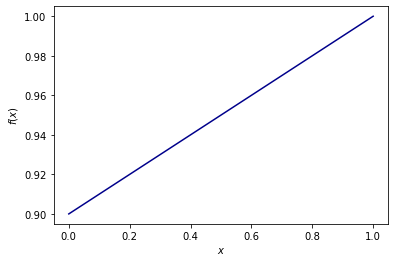

In [439]:
n = 100000
tickets = [0]*9 + [1] # создаем массив с суммами
#np.random.shuffle(tickets) #создаем случайный список из 10 лотерейных билетов, 1 из которых выигрышный

df7 = pd.DataFrame(np.random.choice(tickets, size=n)) # n-раз вытаскиваем билет
# df7.hist()
# plt.title('Распределение случайной величины Х')
# plt.xlabel('сумма выигрыша')
# plt.ylabel('частота появления')
# plt.show()


bernoulli_rv = sts.bernoulli(0.1) # задаётся один параметр -- вероятность успеха
cdf = bernoulli_rv.cdf(tickets)
cdf
plt.plot(tickets, cdf, color="darkblue")
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.plot()

Предлагается также решить задачу: 

### Задача 8
Брошены две игральные кости. Найти закон распределения случайной величины $X$, равной сумме выпавших очков. Найти вероятности событий ${X <= 4}$, ${X > 4}$

## Условные вероятности

### Задача 9
Из колоды (36 карт) вынимают последовательно без возвращения две карты. Найти вероятность того, что первой картой была шестерка, а второй — семерка. Найти условную вероятность того же события при условии, что обе карты бубновой масти.


In [45]:
n = 100000
suits = 'cdhs'
ranks = '6789TJQKA'
deck = [''.join(card) for card in product(ranks, suits)] # создаем колоду из 36 карт
# hand = np.random.choice(deck, 2, replace=False) 
hands = pd.DataFrame(np.random.choice(deck, 2, replace=False) for _ in range(n))# выбираем 2 карты без возвращения n раз

In [46]:
hands

,0,1
0,7d,Jc
1,Kd,Th
2,Kd,6d
3,9s,7h
4,9d,Qs
...,...,...
99995,7h,Qs
99996,Tc,Th
99997,Kc,6h
99998,8c,Qc


Предлагается также решить задачу: 

### Задача 10
Из урны, содержащей два белых и три черных шара, последовательно извлекают два шара; вынутые шары не возвращаются. Если первый шар оказался черным, то перед вторым извлечением в урну добавляют белый шар. В противном случае состав оставшихся шаров не меняют. Найти вероятности событий:

$A$ = {извлечены два белых шара},

$B$ = {извлечены два черных шара}

Указание. Пусть событие $C_1$ = {первый шар белый}, событие $C_2$ = {второй шар белый}. Тогда $A = C_1C_2$, $B = \overline C_1 \overline C_2$ 